In [8]:
from matplotlib import pyplot as plt

In [9]:
import pandas as pd

df = pd.read_csv('Test_meteorology.csv')
import numpy as np

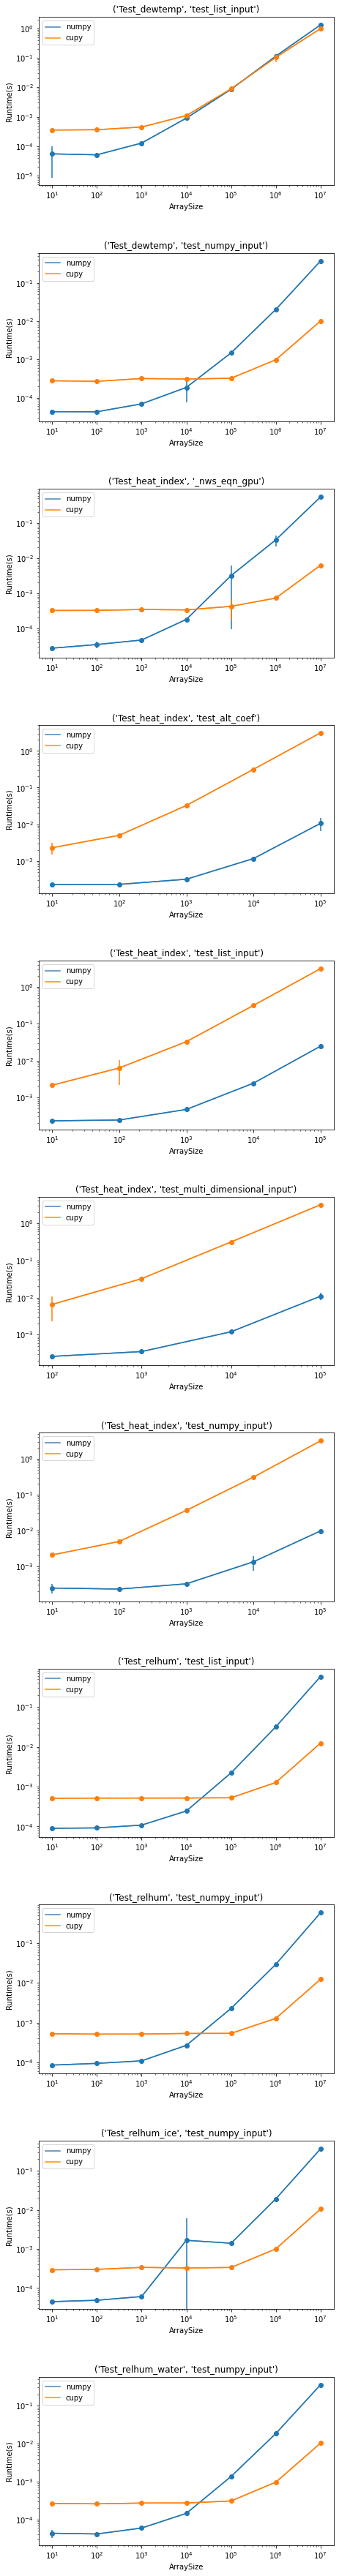

In [12]:
#Test_dewtemp
#test_list_input
Routines = np.unique(df['Routine'])
fig, axes = plt.subplots(nrows=11, ncols=1, figsize=(7, 60))
plt.xscale("log")
plotindex = 0
for rot in Routines:
    data = df.loc[(df['Routine'] == rot)]
    functions = np.unique(data['TestFunctionName'])
    for func in functions:
        subdata = data.loc[(data['TestFunctionName'] == func)]
        arraysizes = np.unique(subdata['ArraySize'])
        sd_numpy = np.zeros(len(arraysizes))
        sd_cupy = np.zeros(len(arraysizes))
        y_numpy = np.zeros(len(arraysizes))
        y_cupy = np.zeros(len(arraysizes))
        for i in range(0,len(arraysizes)):
            cupydata = subdata.loc[(subdata['ArraySize'] == arraysizes[i]) & (subdata['Approach'] == 'cupy')]
            numpydata = subdata.loc[(subdata['ArraySize'] == arraysizes[i]) & (subdata['Approach'] == 'numpy')]
            y_cupy[i] = np.mean(cupydata['Runtime(s)'])
            y_numpy[i] = np.mean(numpydata['Runtime(s)'])
            sd_cupy[i] = np.std(cupydata['Runtime(s)'])
            sd_numpy[i] = np.std(numpydata['Runtime(s)'])
        axes[plotindex].errorbar(arraysizes, y_numpy, yerr=sd_numpy, fmt='-o')
        axes[plotindex].errorbar(arraysizes, y_cupy, yerr=sd_cupy, fmt='-o')
        axes[plotindex].plot(arraysizes, y_numpy, label='numpy',color="steelblue")
        axes[plotindex].plot(arraysizes, y_cupy, label='cupy',color="darkorange")  # Plot more data on the axes...
        axes[plotindex].set_xlabel('ArraySize')  # Add an x-label to the axes.
        axes[plotindex].set_ylabel('Runtime(s)')  # Add a y-label to the axes.
        axes[plotindex].set_title((rot, func))
        axes[plotindex].legend();  # Add a legend.
        axes[plotindex].set_xscale('log')
        axes[plotindex].set_yscale('log')
        plotindex = plotindex + 1
        
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig("test_meteorology.jpg",dpi=fig.dpi)
# Display
plt.show()